# iris flower species predicution

### importing things

In [2]:
import numpy as np
import pandas as pd
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


In [26]:
df = pd.read_csv('iris.csv')
df = df.drop(columns=['Id'])
df = df.rename(columns={'SepalLengthCm':'sepallength', 'SepalWidthCm':'sepalwidth','PetalLengthCm':'petallength' ,'PetalWidthCm':'petalwidth'} )
print(df.head())

   sepallength  sepalwidth  petallength  petalwidth      Species
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa


### to display some stats

In [27]:
df.describe()



,sepallength,sepalwidth,petallength,petalwidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   Species      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [29]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

### preeprocess the data

In [30]:
# null values
df.isnull().sum()




sepallength    0
sepalwidth     0
petallength    0
petalwidth     0
Species        0
dtype: int64

## some graph

<Axes: >

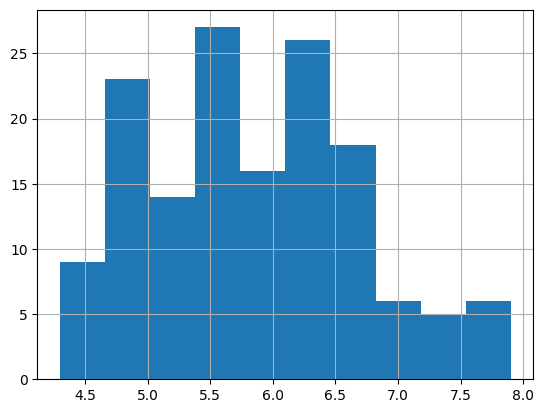

In [31]:
df['sepallength'].hist()


<Axes: >

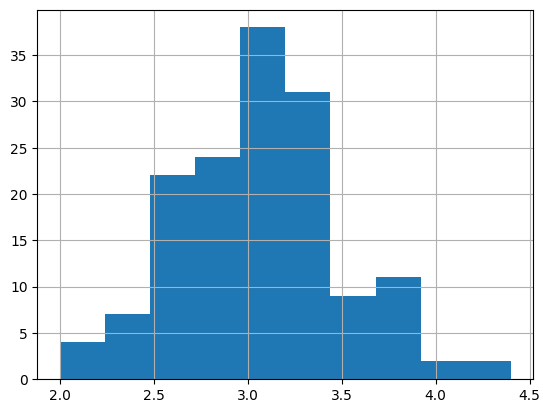

In [24]:
df['sepalwidth'].hist()


<Axes: >

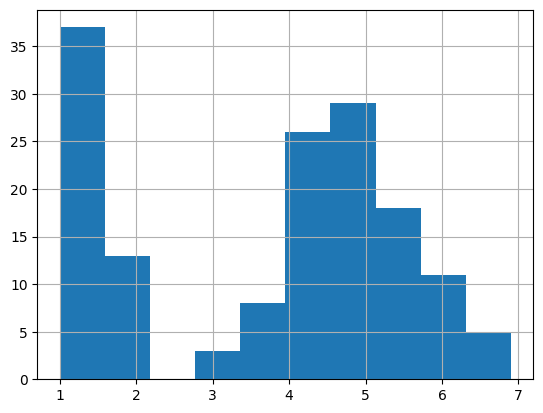

In [33]:
df['petallength'].hist()


<Axes: >

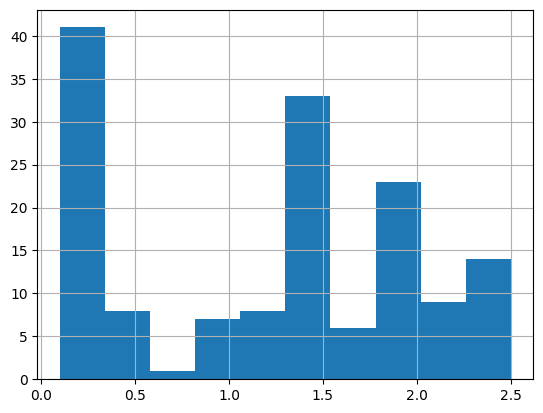

In [34]:
df['petalwidth'].hist()

In [36]:
# scatterplot
colors = ['red', 'blue', 'green']
species = df['Species'].unique()


Text(0, 0.5, 'sapel width')

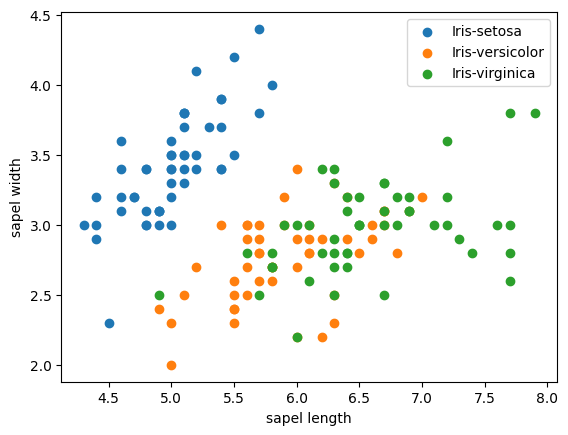

In [37]:
for i in range(len(species)):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['sepallength'],x['sepalwidth'] , label = species[i])
plt.legend()
plt.xlabel("sapel length")
plt.ylabel("sapel width")




Text(0, 0.5, 'petal width')

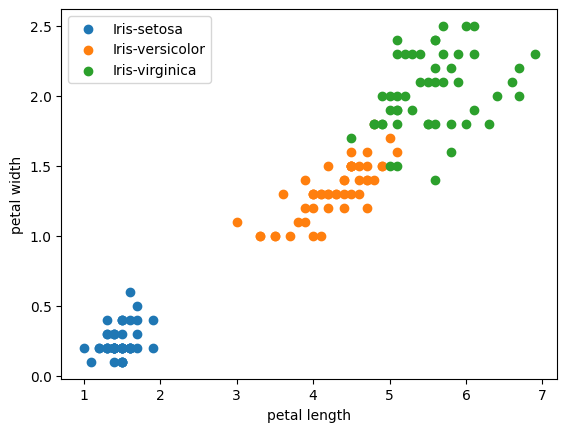

In [38]:
for i in range(len(species)):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['petallength'],x['petalwidth'] , label = species[i])
plt.legend()
plt.xlabel("petal length")
plt.ylabel("petal width")

Text(0, 0.5, 'petal length')

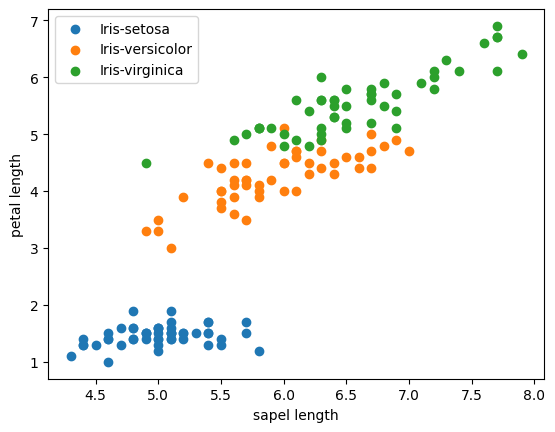

In [40]:
for i in range(len(species)):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['sepallength'],x['petallength'] , label = species[i])
plt.legend()
plt.xlabel("sapel length")
plt.ylabel("petal length")

Text(0, 0.5, 'sapel width')

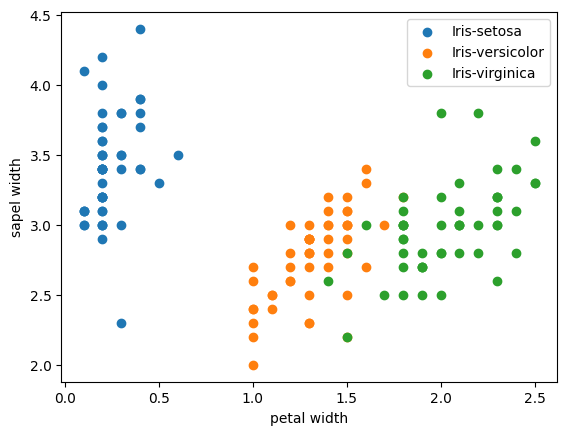

In [41]:
for i in range(len(species)):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['petalwidth'],x['sepalwidth'] , label = species[i])
plt.legend()
plt.xlabel("petal width")
plt.ylabel("sapel width")

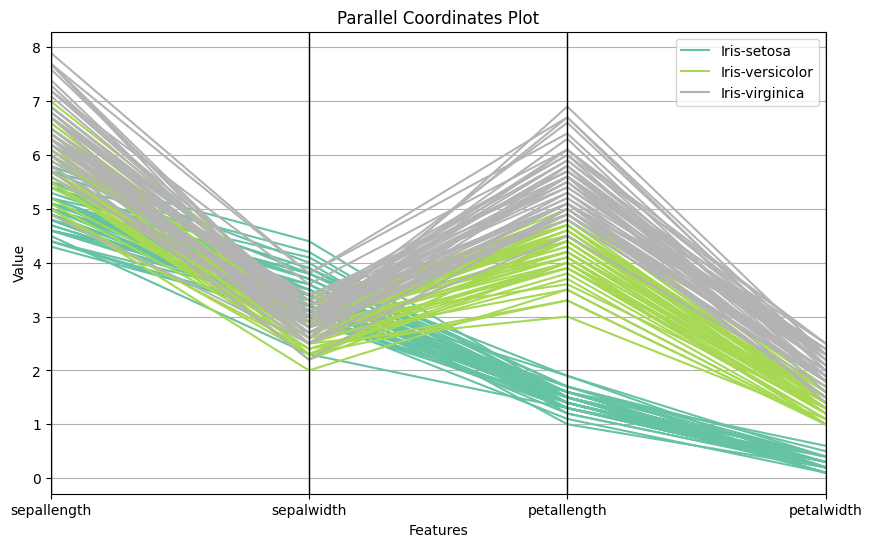

In [42]:
df['Species'] = df['Species'].astype('category')

# Plot parallel coordinates
plt.figure(figsize=(10,6))
parallel_coordinates(df, 'Species', colormap=plt.cm.Set2)
plt.title('Parallel Coordinates Plot')
plt.xlabel('Features')
plt.ylabel('Value')
plt.grid(True)
plt.show()

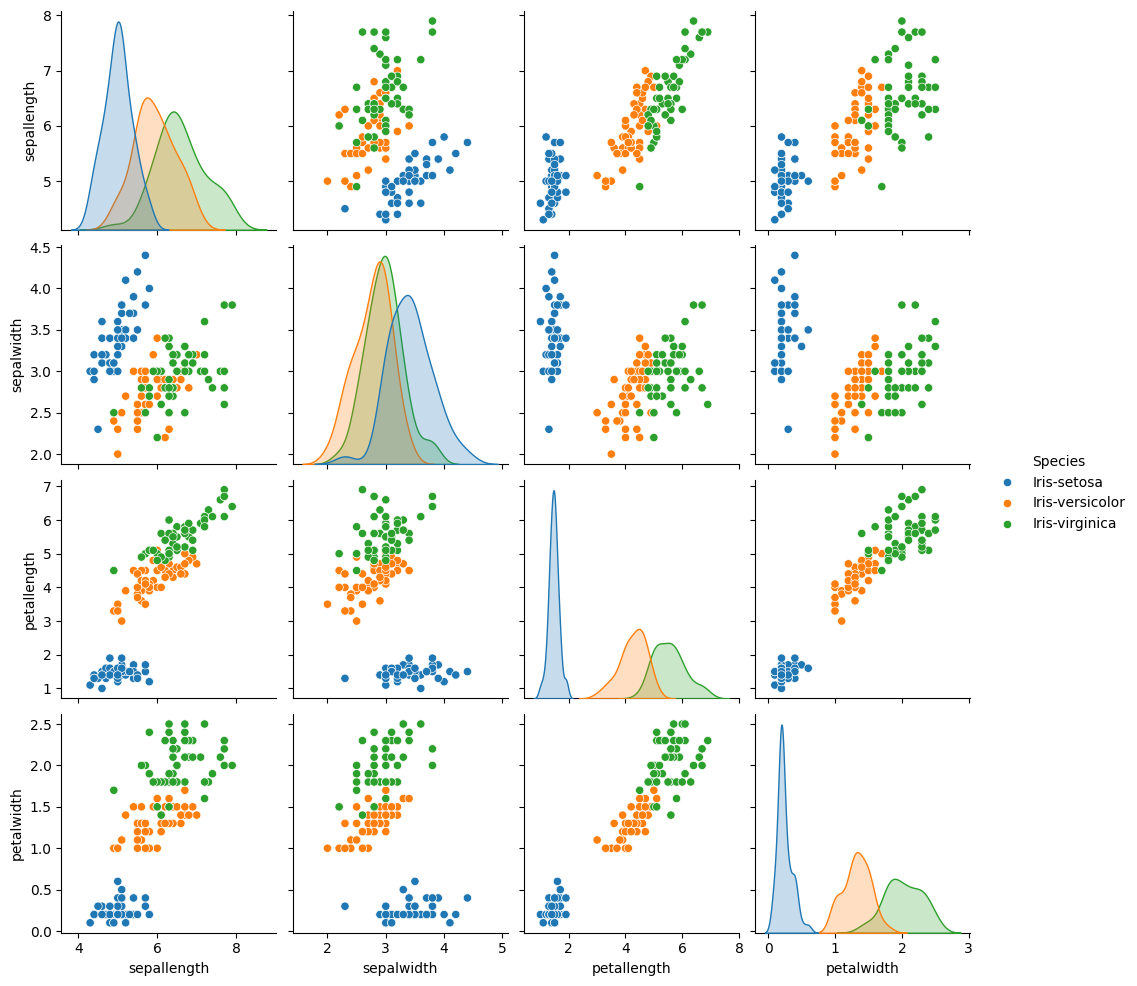

In [43]:
sns.pairplot(df,hue = 'Species')

<Axes: >

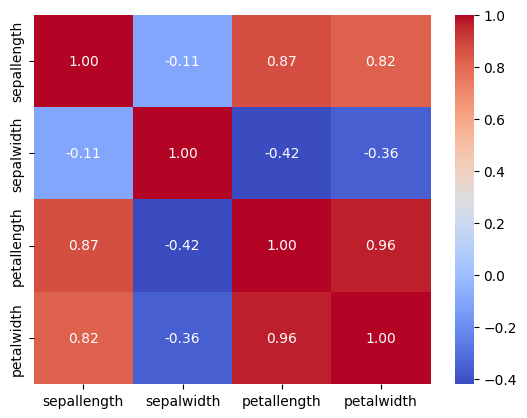

In [44]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')

### converting species name into numeric valuse 

In [45]:
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
df

,sepallength,sepalwidth,petallength,petalwidth,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### seperating data for training and testing

In [58]:
x = df.drop(columns=['Species'])
y = df['Species']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30)


## model training

### LogisticRegression

In [ ]:
model1  = LogisticRegression(max_iter=200)
model1.fit(x_train,y_train)
print("logestic regression accuracy",model1.score(x_test,y_test))

logestic regression accuracy 0.9555555555555556


### KNeighborsClassifier

In [62]:
model2 = KNeighborsClassifier()
model2.fit(x_train, y_train)
print("KNN accuracy:", model2.score(x_test, y_test))

KNN accuracy: 0.9333333333333333


### DecisionTreeClassifier

In [66]:
model3= DecisionTreeClassifier()
model3.fit(x_train, y_train)
print("Decision Tree accuracy:", model3.score(x_test, y_test))


Decision Tree accuracy: 0.9555555555555556
